这里演示了使用逻辑回归的方式 进行识别 手写数字

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy import optimize
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题
% matplotlib inline

In [2]:
# 显示100个数字
def display_data(imgData):
    sum = 0
    '''
    显示100个数（若是一个一个绘制将会非常慢，可以将要画的数字整理好，放到一个矩阵中，显示这个矩阵即可）
    - 初始化一个二维数组
    - 将每行的数据调整成图像的矩阵，放进二维数组
    - 显示即可
    '''
    pad = 1
    display_array = -np.ones((pad+10*(20+pad),pad+10*(20+pad)))
    for i in range(10):
        for j in range(10):
            display_array[pad+i*(20+pad):pad+i*(20+pad)+20,pad+j*(20+pad):pad+j*(20+pad)+20] = (imgData[sum,:].reshape(20,20,order="F"))    # order=F指定以列优先，在matlab中是这样的，python中需要指定，默认以行
            sum += 1
            
    plt.imshow(display_array,cmap='gray')   # 显示灰度图像
    plt.axis('off')
    plt.show()

In [3]:
# 求每个分类的theta，最后返回所有的all_theta    
def oneVsAll(X,y,num_labels,Lambda):
    # 初始化变量
    m,n = X.shape
    all_theta = np.zeros((n+1,num_labels))  # 每一列对应相应分类的theta,共10列
    X = np.hstack((np.ones((m,1)),X))       # X前补上一列1的偏置bias
    class_y = np.zeros((m,num_labels))      # 数据的y对应0-9，需要映射为0/1的关系
    initial_theta = np.zeros((n+1,1))       # 初始化一个分类的theta
    
    # 映射y
    for i in range(num_labels):
        class_y[:,i] = np.int32(y==i).reshape(1,-1) # 注意reshape(1,-1)才可以赋值
    
    #np.savetxt("class_y.csv", class_y[0:600,:], delimiter=',')    
    
    '''遍历每个分类，计算对应的theta值'''
    for i in range(num_labels):
        #optimize.fmin_cg
        result = optimize.fmin_bfgs(costFunction, initial_theta, fprime=gradient, args=(X,class_y[:,i],Lambda)) # 调用梯度下降的优化方法
        all_theta[:,i] = result.reshape(1,-1)   # 放入all_theta中
        
    all_theta = np.transpose(all_theta) 
    return all_theta

In [4]:
# S型函数    
def sigmoid(Z):
    A = 1.0/(1.0+np.exp(-Z))
    return A

# 代价函数
def costFunction(initial_theta,X,y,inital_lambda):
    m = len(y)
    J = 0
    
    h = sigmoid(np.dot(X,initial_theta))    # 计算h(z)
    theta1 = initial_theta.copy()           # 因为正则化j=1从1开始，不包含0，所以复制一份，前theta(0)值为0 
    theta1[0] = 0   
    
    temp = np.dot(np.transpose(theta1),theta1)
    J = (-np.dot(np.transpose(y),np.log(h))-np.dot(np.transpose(1-y),np.log(1-h))+temp*inital_lambda/2)/m   # 正则化的代价方程
    return J

# 计算梯度
def gradient(initial_theta,X,y,inital_lambda):
    m = len(y)
    grad = np.zeros((initial_theta.shape[0]))
    
    h = sigmoid(np.dot(X,initial_theta))  # 计算h(z)
    theta1 = initial_theta.copy()
    theta1[0] = 0

    grad = np.dot(np.transpose(X),h-y)/m+inital_lambda/m*theta1 #正则化的梯度
    return grad   
    

In [5]:
# 预测
def predict_oneVsAll(all_theta,X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros((m,1))
    X = np.hstack((np.ones((m,1)),X))   # 在X最前面加一列1
    
    h = sigmoid(np.dot(X,np.transpose(all_theta)))  # 预测

    '''
    返回h中每一行最大值所在的列号
    - np.max(h, axis=1)返回h中每一行的最大值（是某个数字的最大概率）
    - 最后where找到的最大概率所在的列号（列号即是对应的数字）
    '''
    p = np.array(np.where(h[0,:] == np.max(h, axis=1)[0]))  
    for i in np.arange(1, m):
        t = np.array(np.where(h[i,:] == np.max(h, axis=1)[i]))
        p = np.vstack((p,t))
    return p

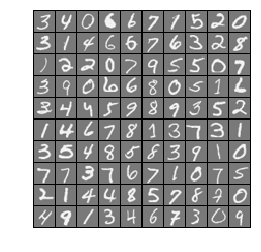

Optimization terminated successfully.
         Current function value: 0.008583
         Iterations: 288
         Function evaluations: 289
         Gradient evaluations: 289
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 286
         Function evaluations: 287
         Gradient evaluations: 287
Optimization terminated successfully.
         Current function value: 0.050810
         Iterations: 439
         Function evaluations: 440
         Gradient evaluations: 440
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 424
         Function evaluations: 425
         Gradient evaluations: 425
Optimization terminated successfully.
         Current function value: 0.033075
         Iterations: 396
         Function evaluations: 397
         Gradient evaluations: 397
Optimization terminated successfully.
         Current function value: 0.054466
         Iterations: 433
         Function ev

In [6]:
data = spio.loadmat("../data/2-logistic_regression/data_digits.mat")
X = data['X']   # 获取X数据，每一行对应一个数字20x20px
y = data['y']
m,n = X.shape
num_labels = 10  # 数字个数，0-9

##　随机显示几行数据
rand_indices = [t for t in [np.random.randint(x-x, m) for x in range(100)]]  # 生成100个0-m的随机数
display_data(X[rand_indices,:])     # 显示100个数字

Lambda = 0.1    # 正则化系数
#y = y.reshape(-1,1)
all_theta = oneVsAll(X, y, num_labels, Lambda)  # 计算所有的theta

p = predict_oneVsAll(all_theta,X)               # 预测
# 将预测结果和真实结果保存到文件中
#res = np.hstack((p,y.reshape(-1,1)))
#np.savetxt("predict.csv", res, delimiter=',')

print(u"预测准确度为：%f%%" % np.mean((p == y.reshape(-1,1))*100))